<a href="https://colab.research.google.com/github/fjadidi2001/DataScienceJourney/blob/master/Face_pretrainmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install inference-cli && inference server start

Error connecting to Docker daemon. Is docker installed and running? See https://www.docker.com/get-started/ for installation instructions.


In [3]:
from inference_sdk import InferenceHTTPClient

CLIENT = InferenceHTTPClient(
    api_url="https://detect.roboflow.com",
    api_key="2IGtFaicFMGaMwb2mX8A"
)

# Function to process multiple images
def detect_faces(image_paths):
    results = []
    for image_path in image_paths:
        result = CLIENT.infer(image_path, model_id="face-detection-mik1i/21")
        results.append(result)
    return results

# Example usage with 5 images
image_paths = [
    "/content/imgs/MultipleFaces.jpg",
    "/content/imgs/MultipleFaces2.jpg",
    "/content/imgs/SingleFace.jpg",
    "/content/imgs/SingleFace2.jpg",
    "/content/imgs/SingleFace3.jpg"
]

# Get detection results
detection_results = detect_faces(image_paths)

# Process and display results
for i, result in enumerate(detection_results):
    print(f"Image {i+1} detection results:")

    # If you want to extract face detection information
    if "predictions" in result:
        faces = result["predictions"]
        print(f"Found {len(faces)} faces")

        for j, face in enumerate(faces):
            confidence = face.get("confidence", 0)
            bbox = face.get("bbox", {})
            print(f"  Face {j+1}: Confidence {confidence:.2f}, Position: x={bbox.get('x')}, y={bbox.get('y')}, w={bbox.get('width')}, h={bbox.get('height')}")
    else:
        print("  No faces detected or error in detection")
    print()

Image 1 detection results:
Found 3 faces
  Face 1: Confidence 0.93, Position: x=None, y=None, w=None, h=None
  Face 2: Confidence 0.91, Position: x=None, y=None, w=None, h=None
  Face 3: Confidence 0.91, Position: x=None, y=None, w=None, h=None

Image 2 detection results:
Found 2 faces
  Face 1: Confidence 0.92, Position: x=None, y=None, w=None, h=None
  Face 2: Confidence 0.91, Position: x=None, y=None, w=None, h=None

Image 3 detection results:
Found 2 faces
  Face 1: Confidence 0.92, Position: x=None, y=None, w=None, h=None
  Face 2: Confidence 0.48, Position: x=None, y=None, w=None, h=None

Image 4 detection results:
Found 1 faces
  Face 1: Confidence 0.90, Position: x=None, y=None, w=None, h=None

Image 5 detection results:
Found 1 faces
  Face 1: Confidence 0.90, Position: x=None, y=None, w=None, h=None



Image 1: Found 3 faces
  Face 1: Confidence 0.93, Position: x=728.5, y=170.0, w=169.0, h=202.0
  Face 2: Confidence 0.91, Position: x=172.0, y=247.0, w=180.0, h=220.0
  Face 3: Confidence 0.91, Position: x=469.5, y=384.0, w=171.0, h=188.0


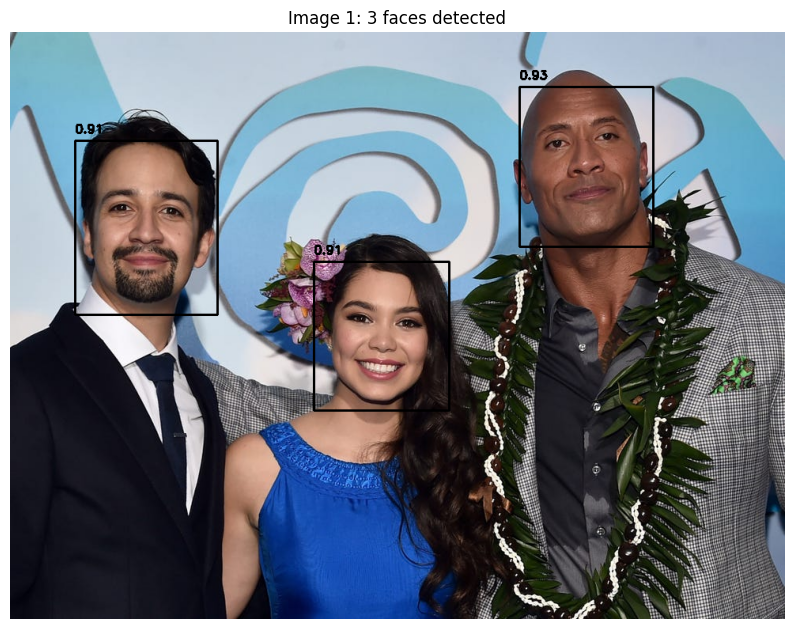

Image 2: Found 2 faces
  Face 1: Confidence 0.92, Position: x=916.5, y=325.0, w=235.0, h=222.0
  Face 2: Confidence 0.91, Position: x=256.0, y=270.5, w=206.0, h=239.0


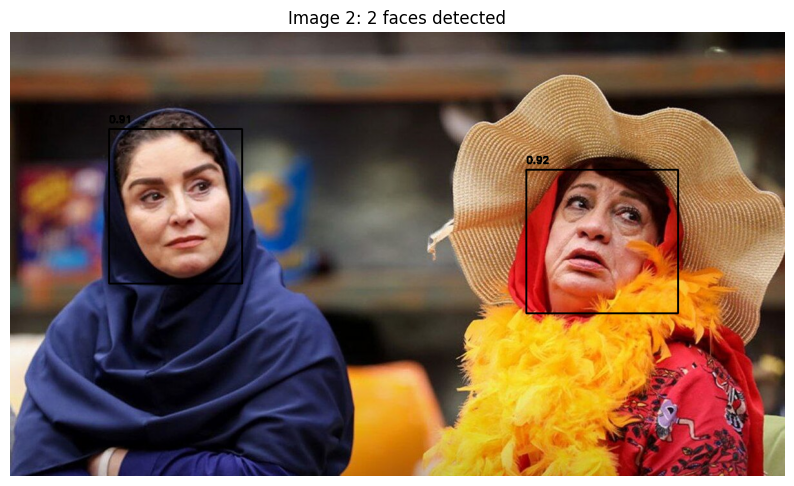

Image 3: Found 2 faces
  Face 1: Confidence 0.92, Position: x=289.5, y=148.0, w=141.0, h=174.0
  Face 2: Confidence 0.48, Position: x=59.5, y=176.5, w=119.0, h=273.0


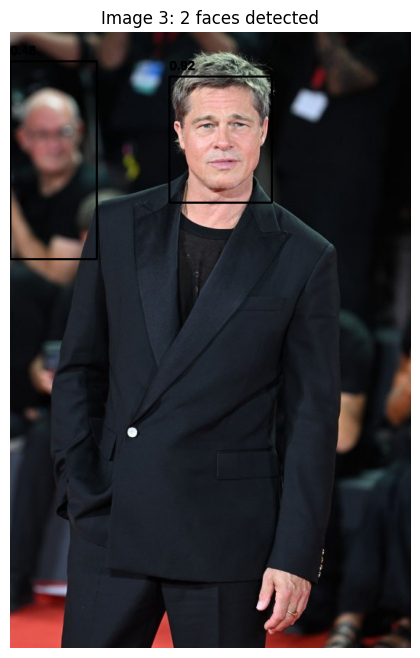

Image 4: Found 1 faces
  Face 1: Confidence 0.90, Position: x=691.0, y=244.0, w=444.0, h=488.0


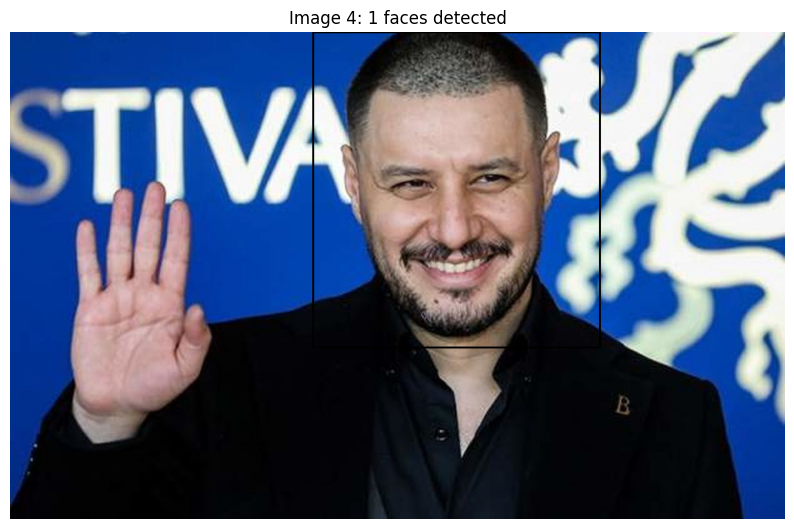

Image 5: Found 1 faces
  Face 1: Confidence 0.90, Position: x=598.5, y=274.0, w=263.0, h=288.0


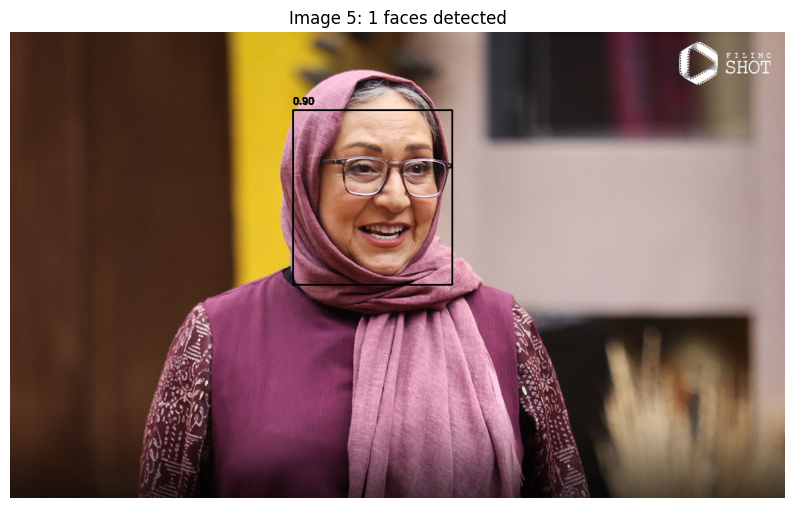

In [5]:
from inference_sdk import InferenceHTTPClient
import cv2
import numpy as np
import matplotlib.pyplot as plt

CLIENT = InferenceHTTPClient(
    api_url="https://detect.roboflow.com",
    api_key="2IGtFaicFMGaMwb2mX8A"
)

def detect_and_visualize_faces(image_paths):
    for i, image_path in enumerate(image_paths):
        # Load the image
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for matplotlib

        # Run face detection
        result = CLIENT.infer(image_path, model_id="face-detection-mik1i/21")

        # Process results
        if "predictions" in result:
            faces = result["predictions"]
            print(f"Image {i+1}: Found {len(faces)} faces")

            # Get image dimensions
            height, width = image.shape[:2]

            # Draw rectangles around faces
            for j, face in enumerate(faces):
                confidence = face.get("confidence", 0)

                # Extract bounding box coordinates
                # The exact key names may vary based on the API response
                # Let's try different possible formats
                x = face.get("x", face.get("x_center", None))
                y = face.get("y", face.get("y_center", None))
                w = face.get("width", face.get("w", None))
                h = face.get("height", face.get("h", None))

                # If we have x, y, w, h coordinates
                if all([x is not None, y is not None, w is not None, h is not None]):
                    # Convert center coordinates to top-left corner if needed
                    x1 = int(x - w/2)
                    y1 = int(y - h/2)
                    x2 = int(x + w/2)
                    y2 = int(y + h/2)

                    # Draw rectangle
                    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 0, 0), 2)

                    # Add confidence text
                    cv2.putText(image, f"{confidence:.2f}", (x1, y1-10),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)

                    print(f"  Face {j+1}: Confidence {confidence:.2f}, Position: x={x}, y={y}, w={w}, h={h}")
                else:
                    # Alternative approach: check if coordinates are in a different format
                    bbox = face.get("bbox", {})
                    if bbox:
                        x = bbox.get("x")
                        y = bbox.get("y")
                        w = bbox.get("width")
                        h = bbox.get("height")

                        if all([x is not None, y is not None, w is not None, h is not None]):
                            # Same drawing code as above
                            x1 = int(x - w/2)
                            y1 = int(y - h/2)
                            x2 = int(x + w/2)
                            y2 = int(y + h/2)

                            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 0, 0), 2)
                            cv2.putText(image, f"{confidence:.2f}", (x1, y1-10),
                                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)

                            print(f"  Face {j+1}: Confidence {confidence:.2f}, Position: x={x}, y={y}, w={w}, h={h}")

            # Display the image
            plt.figure(figsize=(10, 8))
            plt.imshow(image)
            plt.title(f"Image {i+1}: {len(faces)} faces detected")
            plt.axis('off')
            plt.show()
        else:
            print(f"Image {i+1}: No faces detected or error in detection")

# Example usage with your 5 images
image_paths = [
    "/content/imgs/MultipleFaces.jpg",
    "/content/imgs/MultipleFaces2.jpg",
    "/content/imgs/SingleFace.jpg",
    "/content/imgs/SingleFace2.jpg",
    "/content/imgs/SingleFace3.jpg"
]

# Run detection and visualization
detect_and_visualize_faces(image_paths)